# Machine Learning with Scikit-Learn

In this notebook we will be creating predictive models using our cleaned data from the ***Data Cleaning*** notebook.

In [6]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
%matplotlib inline

from sklearn.model_selection import train_test_split

#Some of these packages will generate a ton of warnings...
import warnings
warnings.filterwarnings("ignore")

In [39]:
%watermark

UsageError: Line magic function `%watermark` not found.


In [7]:
# read in data
df = pd.read_csv('data/clean_data.csv')

In [8]:
# set option to see all columns
pd.set_option('display.max_columns', None)
# check
df.sample(5)

,winner_is_blue,is_title_bout,no_of_rounds,lose_streak_dif,win_streak_dif,win_dif,loss_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Southpaw,B_Switch,R_Southpaw,R_Switch,better_rank_Red,weight_dif,ev_dif,draw_dif,avg_SIG_STR_pct_dif,avg_TD_pct_dif,win_by_Decision_Majority_dif,win_by_Decision_Split_dif,win_by_TKO_Doctor_Stoppage_dif
3373,0,0,3,0,-1,-3,3,0,0,-1,-2.54,-7.62,3,-42.833333,-1.000000,-3.166667,0,900.0,0,0,0,0,0,0,1,2013,5,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-15,236.666667,0,-0.033333,-0.378333,0,0,0
1922,0,0,3,1,1,0,-1,0,0,0,0.00,0.00,6,25.333333,-1.333333,2.166667,0,119.0,0,0,0,0,0,1,0,2016,7,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-56.034483,0,-0.110000,0.333333,0,0,0
1111,1,0,3,0,-2,-2,0,0,-2,0,-5.08,-2.54,6,-1.666667,0.000000,-0.333333,0,900.0,0,0,0,0,0,0,1,2018,5,12,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,-91.176471,0,0.063333,-0.266667,0,-1,0
1477,1,1,5,0,-1,1,-2,1,-1,0,0.00,0.00,14,14.750000,0.000000,-1.261364,0,1500.0,0,0,0,0,0,0,1,2017,7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,-33.076923,0,-0.145682,-0.038523,0,-1,0
3179,1,0,3,0,0,4,-4,0,1,1,-7.62,-5.08,3,10.246154,0.800000,0.738462,0,900.0,0,0,0,0,0,0,1,2013,11,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,-142.380952,0,-0.171846,0.350615,0,1,0


As we mentioned in the data cleaning notebook the winning classes are imbalanced with the red corner fighters having a higher win count than the blue corner. Since we do not have much data and the balances are not that far off where we would be doubling or tripling our blue winners, it would be a good idea to oversample here to not lose any data. We can use `imbalance learn`'s random over sampler.

In [9]:
# define our X and y
X = df.drop(['winner_is_blue'], axis = 1)
y = df['winner_is_blue']

In [10]:
# check imbalance
y.value_counts()

0    2541
1    1804
Name: winner_is_blue, dtype: int64

In [11]:
# import random over sampler
from imblearn.over_sampling import RandomOverSampler

In [12]:
# instantiate
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# check new balance
y_over.value_counts()

1    2541
0    2541
Name: winner_is_blue, dtype: int64

In [13]:
# create a new dataset from oversampling
df = pd.concat([X_over, y_over], axis=1)

In [14]:
#check
df

,is_title_bout,no_of_rounds,lose_streak_dif,win_streak_dif,win_dif,loss_dif,total_title_bout_dif,ko_dif,sub_dif,height_dif,reach_dif,age_dif,sig_str_dif,avg_sub_att_dif,avg_td_dif,empty_arena,total_fight_time_secs,finish_DQ,finish_KO/TKO,finish_M-DEC,finish_Overturned,finish_S-DEC,finish_SUB,finish_U-DEC,year,month,day,Australia,Brazil,Canada,Chile,China,Croatia,Czech Republic,Denmark,Germany,Ireland,Japan,Mexico,Netherlands,New Zealand,Philippines,Poland,Russia,Singapore,South Korea,Sweden,USA,United Arab Emirates,United Kingdom,Uruguay,Catch Weight,Featherweight,Flyweight,Heavyweight,Light Heavyweight,Lightweight,Middleweight,Welterweight,Women's Bantamweight,Women's Featherweight,Women's Flyweight,Women's Strawweight,B_Southpaw,B_Switch,R_Southpaw,R_Switch,better_rank_Red,weight_dif,ev_dif,draw_dif,avg_SIG_STR_pct_dif,avg_TD_pct_dif,win_by_Decision_Majority_dif,win_by_Decision_Split_dif,win_by_TKO_Doctor_Stoppage_dif,winner_is_blue
0,0,5,1,0,9,4,9,2,-1,0.00,7.62,5,-1.690000,-0.800000,1.420000,1,900.000000,0,0,0,0,1,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,189.028777,1,-0.020000,0.100000,0,0,0,1
1,0,3,-1,0,1,0,0,1,0,2.54,20.32,-1,1.910000,0.000000,0.000000,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,-146.333333,0,0.130000,0.000000,0,0,0,1
2,0,3,3,-1,0,3,0,1,-1,0.00,2.54,8,-0.210000,-0.800000,0.390000,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,743.006993,0,-0.170000,0.250000,0,0,0,1
3,0,3,0,0,0,1,0,1,-1,0.00,5.08,2,-5.730000,-0.400000,-1.580000,1,665.128519,0,1,0,0,0,0,0,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,136.521739,0,-0.120000,0.170000,0,1,0,0
4,0,3,0,0,0,-1,0,0,-1,-2.54,0.00,-7,-0.350000,-1.300000,-2.590000,1,900.000000,0,0,0,0,0,0,1,2020,8,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,-10,-37.007299,0,-0.190000,-1.000000,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5077,0,3,1,0,0,1,0,0,0,0.00,0.00,5,0.000000,0.000000,3.000000,0,900.000000,0,0,0,0,0,0,1,2019,11,16,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-152.446809,0,0.260000,0.370000,0,0,0,1
5078,0,3,1,0,-1,2,0,-1,0,-2.54,5.08,1,-14.000000,0.000000,0.000000,0,900.000000,0,0,0,0,0,0,1,2016,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-56.034483,0,0.253333,0.000000,0,0,0,1
5079,0,3,1,1,-2,1,0,0,0,2.54,-2.54,9,-34.900000,2.300000,0.500000,0,900.000000,0,0,0,0,0,0,1,2013,12,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,112.368421,0,-0.031000,0.115000,0,0,0,1
5080,0,3,0,0,-7,5,0,-4,-2,-7.62,-5.08,12,2.400000,-0.823529,2.858824,0,214.000000,0,1,0,0,0,0,0,2016,12,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-134.545455,0,-0.047882,0.289059,0,0,0,1


#### Dropping the year column:
After trying different methods to split our data, the train_test_split method in sklearn gave me the best results. Ergo, I will drop the year column to basically avoid predicting 'past' results from 'future' matches. The year should not have any major predictive role anyways. Another method of splitting that I tried was to make 2019 and 2020 my test, 2018 my validation and the rest my train data. However, the results are more conistent here.

In [15]:
# drop year
df.drop(['year'], axis=1, inplace = True)

#### Perform train_test_split and scale:
As mentioned, we will use sklearns method of randomly creating train test split tests. We will then scale the data. Only the best scaling method was kept in the notebook after testing with each model. In some cases like decision trees scaling doesn't affect the model, and in some it even lowered our accuracy so scaling was left out in those models too.

In [126]:
# define our X and y
X = df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y = df['winner_is_blue']

# create test and remainder sets
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.15,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_val, y_train, y_val = \
    train_test_split(X_remainder, y_remainder, test_size = 0.15,
                     random_state=1)

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

### Initial Tests:

Lets first perform a test using a simple logistic regression model to see what accuracy range we are at in general.

In [128]:
C_range = np.array([.00001, .0001, .001, .1,
                    1, 10, 100, 1000, 10000, 100000])
accuracy = []

for c in C_range:
    # 1. Instantiate the model
    log_reg = LogisticRegression(C = c)
    # 2. Fit the model
    log_reg.fit(X_train, y_train)
    # Score on training data 
    print(f'Training accuracy: {log_reg.score(X_train, y_train)}')
    # Score on testing data
    print(f'Test accuracy: {log_reg.score(X_val, y_val)}')
    
    accuracy.append(log_reg.score(X_val, y_val))

Training accuracy: 0.6464178697902478
Test accuracy: 0.6759259259259259
Training accuracy: 0.6496867338599837
Test accuracy: 0.6712962962962963
Training accuracy: 0.6567692726777444
Test accuracy: 0.6790123456790124
Training accuracy: 0.6649414328520838
Test accuracy: 0.6820987654320988
Training accuracy: 0.6660310542086625
Test accuracy: 0.683641975308642
Training accuracy: 0.6663034595478071
Test accuracy: 0.6820987654320988
Training accuracy: 0.6663034595478071
Test accuracy: 0.6820987654320988
Training accuracy: 0.6663034595478071
Test accuracy: 0.6820987654320988
Training accuracy: 0.6663034595478071
Test accuracy: 0.6820987654320988
Training accuracy: 0.6663034595478071
Test accuracy: 0.6820987654320988


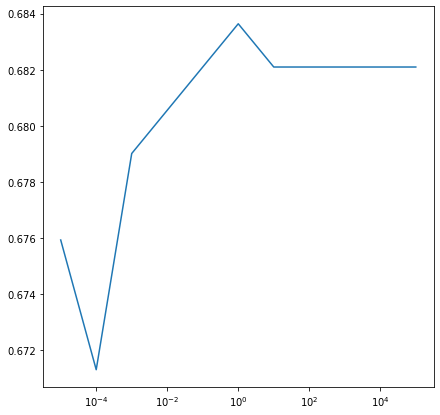

In [129]:
plt.figure(figsize = (7,7))
plt.plot(C_range, accuracy)
plt.xscale('log')

We are getting a 68% ccuracy with our logistic model which is a promising start. Keep in mind that logistic regression is always one of the best performing classifiers despite its simplicity so we are no likely to achieve an accuracy score above 75% from any model.

Lets now try the decision tree, random forrest, and some boosting classifiers.

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [131]:
# define our X and y
X = df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y = df['winner_is_blue']

# create test and remainder sets
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.15,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_val, y_train, y_val = \
    train_test_split(X_remainder, y_remainder, test_size = 0.15,
                     random_state=1)

In [132]:
DT_model = DecisionTreeClassifier()
RF_model = RandomForestClassifier()
AB_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()
XGB_model = XGBClassifier()

DT_model.fit(X_train, y_train)
RF_model.fit(X_train, y_train)
AB_model.fit(X_train, y_train)
GB_model.fit(X_train, y_train)
XGB_model.fit(X_train, y_train)

print("Test Set Scores:")
print(f"Random Forest score: {RF_model.score(X_val,y_val)}")
print(f"Decision Tree score: {DT_model.score(X_val,y_val)}")
print(f"AdaBoost score: {AB_model.score(X_val,y_val)}")
print(f"Gradient Boost score: {GB_model.score(X_val,y_val)}")
print(f"XG Boost score: {XGB_model.score(X_val, y_val)}")

Test Set Scores:
Random Forest score: 0.7314814814814815
Decision Tree score: 0.6882716049382716
AdaBoost score: 0.6666666666666666
Gradient Boost score: 0.7021604938271605
XG Boost score: 0.6944444444444444


These scores seem very promising. It should be noted that since we have small validation sets the results could be a bit random. For example, we can see a 73 accuracy from the random forrest which hasn't been optimized yet. We should now start optimizing hyperparameters for different models and see which models give us the best outcomes.

### Hyperparameter Optimization with GridSearch

#### Model 1: XG Boost

In [17]:
# define our X and y
X = df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y = df['winner_is_blue']

# create test and remainder sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.15,
                     random_state=10)

In [18]:
from sklearn.model_selection import GridSearchCV

In [136]:
# Make the param grid
param_grid = {'n_estimators':np.arange(1, 601, 20), 'max_depth':np.arange(5, 8)}

# Instantiate GS
xgb_gs = GridSearchCV(XGBClassifier(), param_grid=param_grid, n_jobs=-1, verbose=1)

# Fit GS
xgb_gs.fit(X_train, y_train)

# Score
xgb_gs.score(X_test, y_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  5.7min finished


0.6972477064220184

In [137]:
xgb_gs.best_params_

{'max_depth': 5, 'n_estimators': 381}

In [101]:
# Pull out the information from the gs and put into a dataframe
results_df = pd.DataFrame(xgb_gs.cv_results_['params'])
results_df['mean_test_score'] = xgb_gs.cv_results_['mean_test_score']

In [102]:
results_df.head()

,max_depth,n_estimators,mean_test_score
0,5,1,0.636952
1,5,21,0.663348
2,5,41,0.664970
3,5,61,0.666821
4,5,81,0.667284


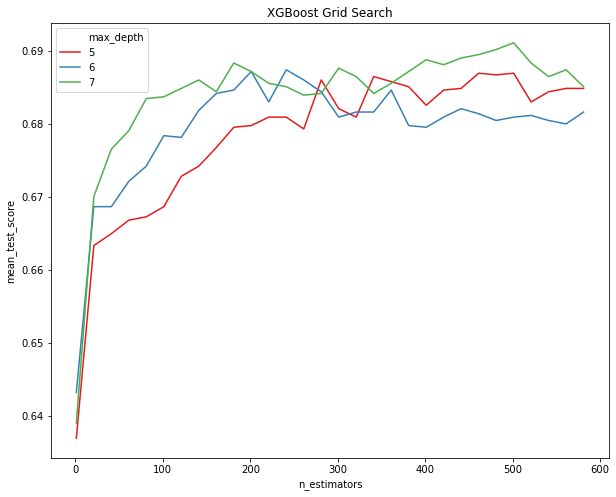

In [108]:
# Plot using seaborn
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=results_df, hue='max_depth', x='n_estimators', y='mean_test_score',
            palette="Set1")
plt.title('XGBoost Grid Search')
plt.savefig('xg.png')

#### Model 2: Gradient Boost

In [ ]:
# Make the param grid
param_grid1 = {'n_estimators':np.arange(1, 501, 10), 'max_depth':np.arange(1, 6)}

# Instantiate GS
gbc_gs = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid1, n_jobs=-1, verbose=1)

# Fit GS
gbc_gs.fit(X_train, y_train)

# Score
gbc_gs.score(X_val, y_val)

In [ ]:
gbc_gs.best_params_

In [35]:
# Pull out the information from the gs and put into a dataframe
results_df1 = pd.DataFrame(gbc_gs.cv_results_['params'])
results_df1['mean_test_score'] = gbc_gs.cv_results_['mean_test_score']

<AxesSubplot:xlabel='n_estimators', ylabel='mean_test_score'>

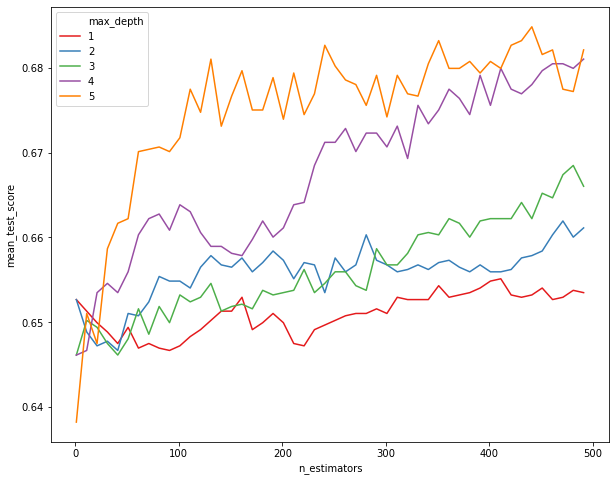

In [36]:
# Plot using seaborn
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=results_df1, hue='max_depth', x='n_estimators', y='mean_test_score',
            palette="Set1")

#### Model 3: Logistic Regression

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
# Make the param grid
param_grid2 = {'C':np.array([.000001, .00001, .0001, .001, .1,
                    1, 10, 100, 1000, 10000, 100000, 1000000])}

# Instantiate GS
lr_gs = GridSearchCV(LogisticRegression(), param_grid=param_grid2, n_jobs=-1, verbose=1)

# Fit GS
lr_gs.fit(X_train, y_train)

# Score
lr_gs.score(X_val, y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished


0.6867283950617284

In [72]:
lr_gs.best_params_

{'C': 100.0}

In [73]:
# Pull out the information from the gs and put into a dataframe
results_df2 = pd.DataFrame(lr_gs.cv_results_['params'])
results_df2['mean_test_score'] = lr_gs.cv_results_['mean_test_score']

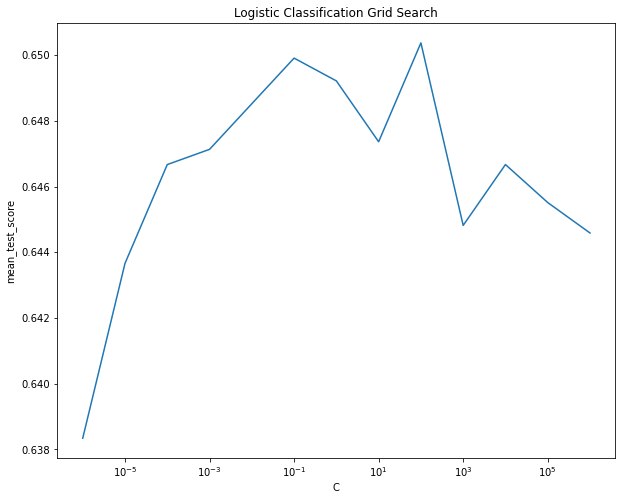

In [107]:
# Plot using seaborn
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=results_df2, x='C', y='mean_test_score',
            palette="Set1")
plt.xscale('log')
plt.title('Logistic Classification Grid Search')
plt.savefig('log1.png')

Now that we have the optimized logistic regression model lets figure out which coefficients were the best contributors to our model.

In [79]:
# define our X and y
X = df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y = df['winner_is_blue']

# create test and remainder sets
X_remainder, X_test, y_remainder, y_test = \
    train_test_split(X, y, test_size = 0.15,
                     random_state=1)

# Splitting the remainder in two chunks
X_train, X_val, y_train, y_val = \
    train_test_split(X_remainder, y_remainder, test_size = 0.15,
                     random_state=1)

In [81]:
# 1. Instantiate the model
log_reg = LogisticRegression(C= 100, solver = 'lbfgs')
# 2. Fit the model
log_reg.fit(X_train, y_train)
# Score on training data 
print(f'Training accuracy: {log_reg.score(X_train, y_train)}')
# Score on testing data
print(f'Test accuracy: {log_reg.score(X_val, y_val)}')

Training accuracy: 0.6466902751293926
Test accuracy: 0.6867283950617284


In [82]:
# Get our model coefficients
log_reg.coef_

array([[-2.97483869e-02,  5.96430395e-02, -9.11971459e-03,
         2.10494021e-03,  2.77260191e-02, -3.86847640e-03,
        -5.19388093e-02,  1.56946878e-02, -2.36225464e-02,
        -1.24200501e-02,  9.51455763e-03,  2.20329667e-02,
         6.70398771e-05,  3.33758471e-02,  5.29302918e-02,
        -2.15150232e-02,  1.07380631e-02, -2.44048040e-03,
         4.27057402e-02, -6.30824869e-02, -1.24904598e-02,
         5.05015127e-03,  3.84701501e-03,  6.72015289e-03,
         6.19927990e-03,  1.82156465e-02,  4.89043264e-03,
         4.24383409e-03, -1.18161996e-02,  6.74483078e-03,
        -9.21120724e-03, -4.80163900e-03,  2.03800416e-03,
        -1.20883581e-05,  8.01754844e-03,  6.04569489e-03,
        -1.94662980e-02,  1.44058024e-02,  5.27255868e-02,
        -2.01843502e-02, -1.69494881e-02, -8.12634005e-03,
         5.02978280e-03, -5.26952925e-02, -8.87814153e-03,
        -2.05837845e-02,  8.10512072e-03,  2.64693341e-02,
         3.39447784e-02,  6.15211609e-02,  4.88864529e-0

In [84]:
# creating the coefficients dataframe
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(np.absolute(log_reg.coef_)))], axis = 1)

# renaming the columns
coefficients.columns = ['Feature', 'Coefficient']

In [88]:
# getting the top 20 words predictive of a negative review
coefficients.sort_values(by = 'Coefficient', ascending = False).head(8)

,Feature,Coefficient
65,win_by_Decision_Split_dif,0.157491
56,R_Southpaw,0.085700
19,Brazil,0.063082
49,Welterweight,0.061521
1,no_of_rounds,0.059643
66,win_by_TKO_Doctor_Stoppage_dif,0.056362
14,avg_td_dif,0.052930
38,USA,0.052726


The first two features make sense as good predictors mainly win by decision split. However, Brazil as the 3rd highest coefficient is slightly worrying. Ideally the significance of these variables should be tested statistically.

#### Model 4: KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
# Make the param grid
param_grid3 = {'n_neighbors':np.arange(1, 1001, 5)}

# Instantiate GS
knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid3, n_jobs=-1, verbose=1)

# Fit GS
knn_gs.fit(X_train, y_train)

# Score
knn_gs.score(X_val, y_val)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.7min finished


0.654320987654321

In [44]:
knn_gs.best_params_

{'n_neighbors': 1}

#### Model 5: Random Forrest

In [90]:
# define our X and y
X = df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y = df['winner_is_blue']

# create test and remainder sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.15,
                     random_state=10)

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
# Make the param grid
param_grid = {'n_estimators':np.arange(1, 501, 10), 'max_depth':np.arange(1, 6)}

# Instantiate GS
rfc_gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs=-1, verbose=1)

# Fit GS
rfc_gs.fit(X_train, y_train)

# Score
rfc_gs.score(X_test, y_test)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 498 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  3.7min finished


0.6422018348623854

In [93]:
rfc_gs.best_params_

{'max_depth': 5, 'n_estimators': 191}

In [ ]:
# Pull out the information from the gs and put into a dataframe
results_df4 = pd.DataFrame(rfc_gs.cv_results_['params'])
results_df4['mean_test_score'] = rfc_gs.cv_results_['mean_test_score']

In [ ]:
# Plot using seaborn
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=results_df1, hue='max_depth', x='n_estimators', y='mean_test_score',
            palette="Set1")

#### Model 6: SVC

In [141]:
from sklearn.svm import SVC 

In [144]:
# define our X and y
X = df.drop(['winner_is_blue', 'total_fight_time_secs', 'finish_DQ', 'finish_KO/TKO', 'finish_M-DEC', 'finish_Overturned',
             'finish_S-DEC', 'finish_SUB', 'finish_U-DEC'], axis = 1)
y = df['winner_is_blue']

# create test and remainder sets
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.15,
                     random_state=123)

In [145]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
svm_gs = GridSearchCV(SVC(), param_grid, refit = True, n_jobs=-1, verbose=1) 
  
# Fit GS
svm_gs.fit(X_train, y_train)

# Score
svm_gs.score(X_test, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:  1.0min finished


0.7391874180865007

In [146]:
svm_gs.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [147]:
# Pull out the information from the gs and put into a dataframe
results_df5 = pd.DataFrame(svm_gs.cv_results_['params'])
results_df5['mean_test_score'] = svm_gs.cv_results_['mean_test_score']

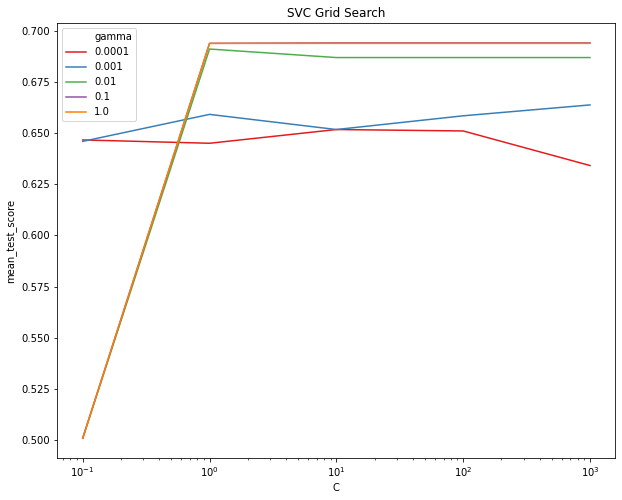

In [150]:
# Plot using seaborn
import seaborn as sns
plt.figure(figsize=(10,8))
sns.lineplot(data=results_df5, hue='gamma', x='C', y='mean_test_score',
            palette="Set1")
plt.title('SVC Grid Search')
plt.xscale('log')
plt.savefig('svm.png')

### Final Results:

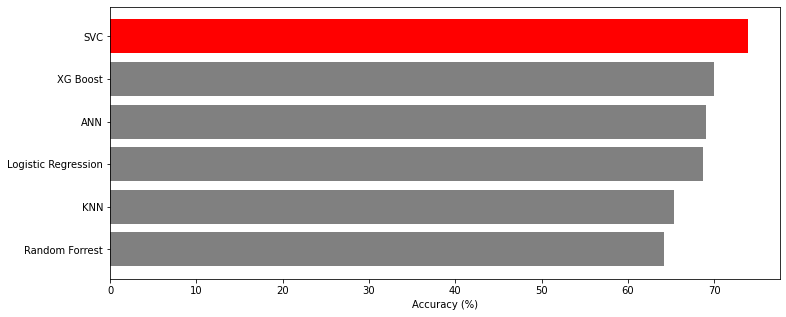

In [38]:
plt.figure(figsize = (12,5))
plt.barh(['Random Forrest', 'KNN', 'Logistic Regression', 'ANN', 'XG Boost', 'SVC'], [64.2, 65.4, 68.7, 69, 70, 73.9], color = ['grey', 'grey', 'grey', 'grey', 'grey', 'red'])
plt.xlabel('Accuracy (%)')
plt.savefig('models.png')
plt.show()

The SVC was our best model.This might be because SVC is usually more effective in higher dimensional spaces, and in cases where the number of samples is not much greater than the number of dimensions.